In [2]:
import networkx as nx
import pandas as pd
from node2vec import Node2Vec

In [3]:
df = pd.read_csv('/home/lxu/Desktop/bindingDB_homosapiens.tsv',sep='\t',low_memory=False)
df.head()

,identity,smile,InChi,D,E,F,G,H,I,J,...,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234
0,143,Cc1nc(CN2CCN(CC2)c2c(Cl)cnc3[nH]c(nc23)-c2cn(C...,InChI=1S/C19H22ClN9O/c1-11-13(9-27(3)25-11)18-...,ZYQKMYRXVHUATB-UHFFFAOYSA-N,247370,"US9447092, 3",Cytochrome P450 3A,Homo sapiens,NaN,>50000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,199,CN(Cc1ccc(s1)C(=O)N[C@@H](CC(O)=O)C(=O)CSCc1cc...,InChI=1S/C27H27ClN2O7S2/c1-30(12-16-6-8-22(31)...,FIEQQFOHZKVJLV-NRFANRHFSA-N,219,5-({[(5-{[(2S)-1-carboxy-4-{[(2-chlorophenyl)m...,Caspase-3,Homo sapiens,90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200,OC(=O)C[C@H](NC(=O)c1ccc(CNS(=O)(=O)c2ccc(O)c(...,InChI=1S/C19H18N2O9S/c22-10-13(7-17(24)25)21-1...,FMTZTJFXNZOBIQ-ZDUSSCGKSA-N,220,5-{[(4-{[(2S)-1-carboxy-3-oxopropan-2-yl]carba...,Caspase-1,Homo sapiens,160,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201,OC(=O)C[C@H](NC(=O)c1ccc(CNS(=O)(=O)c2ccc(O)c(...,InChI=1S/C18H17N3O9S/c22-9-12(5-16(24)25)21-17...,BZEURKGKCWHMON-LBPRGKRZSA-N,221,5-{[(5-{[(2S)-1-carboxy-3-oxopropan-2-yl]carba...,Caspase-1,Homo sapiens,3900,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,202,CN(Cc1ccc(s1)C(=O)N[C@@H](CC(O)=O)C(=O)CSCc1cc...,InChI=1S/C27H27ClN2O7S2/c1-30(12-16-6-8-22(31)...,FIEQQFOHZKVJLV-NRFANRHFSA-N,219,5-({[(5-{[(2S)-1-carboxy-4-{[(2-chlorophenyl)m...,Caspase-1,Homo sapiens,12000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1= df[['E','G','J','L']]
df1


,E,G,J,L
0,247370,Cytochrome P450 3A,>50000,NaN
1,219,Caspase-3,NaN,NaN
2,220,Caspase-1,NaN,NaN
3,221,Caspase-1,NaN,NaN
4,219,Caspase-1,NaN,NaN
5,222,Caspase-1,NaN,NaN
6,223,Caspase-1,NaN,NaN
7,224,Caspase-1,NaN,NaN
8,225,Caspase-1,NaN,NaN
9,226,Caspase-1,NaN,NaN


In [6]:
g=nx.Graph()
for index,row in df1.iterrows():
    if row['E'] not in g.nodes():
        g.add_node(row['E'])
    if row['G'] not in g.nodes():
        g.add_node(row['G'])
g.number_of_nodes()

422058

In [25]:
for index , row in df1.iterrows():
    g.add_edge(row['E'],row['G'],IC50= row['J'],EC50 = row['L'])
g

In [ ]:
node2vec = Node2Vec(g, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.most_similar('2')

Computing transition probabilities:  12%|█▏        | 53584/453363 [2:22:25<2221:24:55, 20.00s/it]

In [8]:
len(g.nodes())

422058

In [24]:
nodelist = list(g.nodes())[0:100000]
nodelist   

[247370,
 'Cytochrome P450 3A',
 219,
 'Caspase-3',
 220,
 'Caspase-1',
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 'Caspase-4',
 228,
 229,
 230,
 231,
 232,
 233,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 'Caspase-7',
 'Caspase-6',
 'Caspase-5',
 'Caspase-8',
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 10246,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 'Caspase-2',
 1664,
 'Hormone-sensitive lipase (HSL)',
 50390707,
 '11-beta-hydroxysteroid dehydrogenase 1',
 1898,
 99782,
 'Focal adhesion kinase 1/vascular endothelial growth factor receptor 3',
 99863,
 2013,
 'Tyrosine-protein kinase JAK2',
 'Tyrosine-protein kinase JAK3',
 2061,
 3003,
 'Epidermal growth factor receptor',
 3004,
 3005,
 3006,
 3007,
 3008,
 3009,
 3010,
 3011,
 3012,
 'Cyclin-Dependent Kinase 1 (CDK1)',
 3013,
 3014,
 3015,
 3016,
 3017,
 3018,
 3019,
 3020,
 3021,
 3022,
 3023,
 3024,
 3025,
 3026,
 3027,
 3028,
 3029,
 3030,
 3031,
 303

In [25]:
sub_graph = g. subgraph(nodelist)
sub_graph

In [26]:
node2vec = Node2Vec(sub_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.most_similar('3013')

Computing transition probabilities: 100%|██████████| 100000/100000 [00:00<00:00, 311838.37it/s]


[('130960', 0.515566349029541),
 ('3590', 0.515506386756897),
 ('11857', 0.5136372447013855),
 ('130994', 0.48804956674575806),
 ('127463', 0.4767167866230011),
 ('79299', 0.4756566286087036),
 ('82922', 0.47092223167419434),
 ('80445', 0.46955522894859314),
 ('146986', 0.45880287885665894),
 ('Beta-hexosaminidase subunit alpha (HexA)', 0.4531604051589966)]

In [7]:
dfhimedge = pd.read_csv('/home/lxu/Desktop/integrate-master/data/edges.sif',sep='\t')
dfhimedge.head()

,source,metaedge,target
0,Compound::DB00843,CtD,Disease::DOID:10652
1,Compound::DB00674,CtD,Disease::DOID:10652
2,Compound::DB01043,CtD,Disease::DOID:10652
3,Compound::DB00989,CtD,Disease::DOID:10652
4,Compound::DB00736,CtD,Disease::DOID:9206


In [8]:
dfhimnode = pd.read_csv('/home/lxu/Desktop/integrate-master/data/nodes.tsv',sep='\t')
dfhimnode.head()

,id,name,kind
0,Anatomy::UBERON:0000002,uterine cervix,Anatomy
1,Anatomy::UBERON:0000004,nose,Anatomy
2,Anatomy::UBERON:0000006,islet of Langerhans,Anatomy
3,Anatomy::UBERON:0000007,pituitary gland,Anatomy
4,Anatomy::UBERON:0000010,peripheral nervous system,Anatomy


In [9]:
himgraph = nx.Graph()
for index,row in dfhimnode.iterrows():
    if row['id'] not in himgraph.nodes():
        himgraph.add_node(row['id'],name= row['name'],kind=row['kind'])
himgraph.number_of_nodes()

47031

In [10]:
for index,row in dfhimedge.iterrows():
    himgraph.add_edge(row['source'],row['target'],metaedge = row['metaedge'])
himgraph

In [7]:
himnodelist = list(himgraph.nodes())[0:10000]
himsub_graph = himgraph. subgraph(himnodelist)
himsub_graph

AttributeError: 'Graph' object has no attribute 'no'

In [17]:
node2vec = Node2Vec(himsub_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1, batch_words=4)
model.wv.most_similar('Anatomy::UBERON:0000002')

Computing transition probabilities: 100%|██████████| 10000/10000 [00:00<00:00, 13105.78it/s]


[('Biological Process::GO:0048757', 0.42528092861175537),
 ('Biological Process::GO:0043585', 0.41806185245513916),
 ('Biological Process::GO:0046777', 0.4006829559803009),
 ('Biological Process::GO:0046512', 0.40019237995147705),
 ('Biological Process::GO:0010884', 0.39844632148742676),
 ('Biological Process::GO:0019240', 0.3933829367160797),
 ('Biological Process::GO:0061043', 0.3877412676811218),
 ('Biological Process::GO:0010867', 0.38343024253845215),
 ('Biological Process::GO:0016577', 0.3821975588798523),
 ('Anatomy::UBERON:0001140', 0.381114661693573)]

In [11]:
df_features = pd.read_csv('/home/lxu/Downloads/transformed-features.tsv',sep ='\t',low_memory=False)
df_features.head()

,compound_id,compound_name,disease_id,disease_name,category,status,prior_prob,prior_logit,degree_CbG,degree_CcSE,...,dwpc_CuGaDuGaD,dwpc_CuGcG<rGaD,dwpc_CuGcGiGaD,dwpc_CuGdDpSpD,dwpc_CuGr>GbCtD,dwpc_CuGuCrCtD,dwpc_CuGuCtD,dwpc_CuGuCtDrD,dwpc_CuGuCuGaD,dwpc_CuGuDuGaD
0,DB01048,Abacavir,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,-0.2955,0.8146,...,-0.5028,-0.4211,-0.45810,-0.53990,-0.357,-0.3849,-0.375,-0.5642,-0.5555,-0.4952
1,DB05812,Abiraterone,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,0.5495,0.5554,...,-0.5028,-0.4211,-0.45810,-0.53990,-0.357,-0.3849,-0.375,-0.5642,-0.5555,-0.4952
2,DB00659,Acamprosate,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,0.9053,1.0220,...,-0.5028,-0.4211,-0.45810,-0.53990,-0.357,-0.3849,-0.375,-0.5642,-0.5555,-0.4952
3,DB00284,Acarbose,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,0.4328,0.3460,...,0.4304,0.6755,-0.07508,-0.08597,-0.357,-0.3849,-0.375,-0.5642,0.8816,0.6339
4,DB01193,Acebutolol,DOID:10652,Alzheimer's disease,NaN,0,0.004753,-5.344,0.1403,0.7966,...,-0.5028,-0.4211,-0.45810,-0.53990,-0.357,-0.3849,-0.375,-0.5642,-0.5555,-0.4952


In [6]:
train_list=[]
train_label=[]
for _,row in df_features[['compound_id','disease_id','status']].iterrows():
    train_list.append(['Compound::'+row['compound_id'],'Disease::'+row['disease_id']])
    train_label.append(row['status'])
train_list[0][1],train_label
    
    

('Disease::DOID:10652',
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [12]:
df_positive = df_features.loc[df_features['status']== 1][0:10]
len(df_positive)

10

In [13]:
df_negative = df_features.loc[df_features['status']== 0][0:20]
len(df_negative)

20

In [18]:
test_graph = himgraph.subgraph(test_nodeslist)
test_graph

In [15]:
import simplejson
subgraph_nodeslist=[]
for index,row in df_positive.iterrows():
    for path in nx.all_simple_paths(himgraph, source='Compound::'+row['compound_id'], target='Disease::'+row['disease_id'],cutoff=3):
        #print(path)
        subgraph_nodeslist=subgraph_nodeslist+path
for i,r in df_negative.iterrows():
     for path in nx.all_simple_paths(himgraph, source='Compound::'+r['compound_id'], target='Disease::'+r['disease_id'],cutoff=3):
        #print(path)
        subgraph_nodeslist=subgraph_nodeslist+path   
subgraph_nodes_list = list(set(subgraph_nodeslist))
subgraph_nodes_list
#f = open('subgraph_nodes.txt', 'w')
#simplejson.dump(subgraph_nodes_list,f)
#f.close()

['Gene::1135',
 'Side Effect::C0025323',
 'Gene::7099',
 'Side Effect::C0028259',
 'Gene::4495',
 'Gene::8317',
 'Side Effect::C0234238',
 'Compound::DB01399',
 'Gene::55958',
 'Side Effect::C0160390',
 'Side Effect::C0242429',
 'Gene::344752',
 'Gene::23305',
 'Side Effect::C0851578',
 'Gene::22978',
 'Gene::79001',
 'Gene::375346',
 'Gene::1329',
 'Side Effect::C0013395',
 'Gene::55290',
 'Side Effect::C0010200',
 'Side Effect::C0022107',
 'Side Effect::C0040264',
 'Side Effect::C0233632',
 'Gene::27095',
 'Gene::10491',
 'Side Effect::C0151826',
 'Gene::4708',
 'Side Effect::C0022650',
 'Symptom::D003147',
 'Side Effect::C0006266',
 'Side Effect::C0008370',
 'Side Effect::C0025345',
 'Compound::DB01403',
 'Side Effect::C0031099',
 'Gene::55256',
 'Gene::6541',
 'Side Effect::C0151905',
 'Gene::1544',
 'Gene::9486',
 'Side Effect::C0028173',
 'Gene::6390',
 'Gene::3309',
 'Gene::3600',
 'Gene::3490',
 'Gene::5576',
 'Gene::28951',
 'Symptom::D010146',
 'Side Effect::C0038990',
 'Side

In [16]:
test_graph = himgraph.subgraph(subgraph_nodes_list)
test_graph

In [17]:
len(subgraph_nodes_list)

2450

In [18]:
test_model = Node2Vec(test_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
t_model = test_model.fit(window=10, min_count=1, batch_words=4)


Computing transition probabilities: 100%|██████████| 2450/2450 [03:07<00:00, 17.04it/s]


In [19]:
import node2vec
positive_list=[]
positve_label=[1,1,1,1,1,1,1,1,1,1]
for _,row in df_positive[['compound_id','disease_id']].iterrows():
    positive_list.append(['Compound::'+row['compound_id'],'Disease::'+row['disease_id']])
negative_list=[]
negative_label=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for _,row in df_negative[['compound_id','disease_id']].iterrows():
    negative_list.append(['Compound::'+row['compound_id'],'Disease::'+row['disease_id']])


21

In [20]:
import node2vec.py

ModuleNotFoundError: No module named 'node2vec.py'

# Create a training graph

/home/lxu/anaconda3/envs/node2vec/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


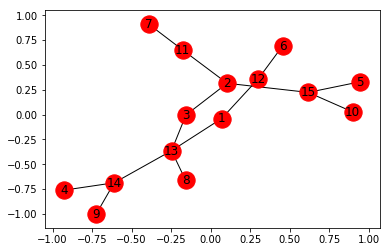

In [19]:
import matplotlib.pyplot as plt



new_graph= nx.Graph()
nodeslist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
edgelist = [[1,12],[12,6],[2,11],[11,7],[2,3],[3,13],[13,8],[4,14],[13,14],[14,9],[5,15],[15,10],[1,13],[15,2]]
for node in nodeslist:
    new_graph.add_node(node)
for edge in edgelist:
    new_graph.add_edge(edge[0],edge[1])
pos = nx.spring_layout(new_graph)
nx.draw_networkx(new_graph)

plt.show()

# Create a test graph

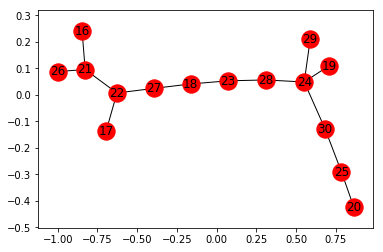

In [21]:
test_graph= nx.Graph()
nodeslist = [16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
edgelist = [[16,21],[21,26],[21,22],[17,22],[22,27],[18,27],[18,23],[23,28],[19,24],[24,28],[24,29],[24,30],[20,25],[25,30]]
for node in nodeslist:
    test_graph.add_node(node)
for edge in edgelist:
    test_graph.add_edge(edge[0],edge[1])
pos = nx.spring_layout(test_graph)
nx.draw_networkx(test_graph)

plt.show()

# Feed traning graph to node2vec

In [13]:
test_model = Node2Vec(new_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
t_model = test_model.fit(window=10, min_count=1, batch_words=4)

t_model.wv.save_word2vec_format('vectors of test_nodes')

Computing transition probabilities: 100%|██████████| 15/15 [00:00<00:00, 15534.46it/s]


In [14]:
f = open('vectors of test_nodes','r')
vec =[]
dict_node={}
for line in f:
    vec= line.split()
    if len(vec) > 2:
        dict_node[vec[0]] = vec[1:]
len(dict_node['13'])

64

In [1]:
train_list=['1,6','2,7','3,8','4,9','5,10']


In [16]:
from node2vec.edges import HadamardEmbedder
X = []
edges_embs = HadamardEmbedder(keyed_vectors=t_model.wv)
edges_embs['3','8']
for i in train_list:
    node1=i[0]
    node2=i[2]
    edge_vec= edges_embs[(node1,node2)].tolist()
    #print(edge_vec)
    X.append(edge_vec)

Y = [1,1,0,0,0]


# Get vectors of test graph

In [22]:
testgraph_model = Node2Vec(test_graph, dimensions=64, walk_length=30, num_walks=200, workers=4)
tg_model = testgraph_model.fit(window=10, min_count=1, batch_words=4)

tg_model.wv.save_word2vec_format('vectors of testgraph_nodes')

Computing transition probabilities: 100%|██████████| 15/15 [00:00<00:00, 4278.74it/s]


In [24]:
f = open('vectors of testgraph_nodes','r')
vec =[]
dict_tg_node={}
for line in f:
    vec= line.split()
    if len(vec) > 2:
        dict_tg_node[vec[0]] = vec[1:]
len(dict_tg_node['20'])

64

In [30]:
test_list=['16,26','17,27','18,28','19,29','20,30']
tg_edges_embs=HadamardEmbedder(keyed_vectors=tg_model.wv)
X_test=[]
for j in test_list:
    node1=j[0:2]
    node2=j[3:]
    tg_edge_vec = tg_edges_embs[(node1,node2)].tolist()
    X_test.append(tg_edge_vec)
X_test

[[0.17738640308380127,
  0.2887718379497528,
  0.22642399370670319,
  0.2084815949201584,
  0.1695021539926529,
  0.018498780205845833,
  0.056504618376493454,
  0.33399420976638794,
  0.312582403421402,
  0.00676103075966239,
  0.1004629135131836,
  0.0018200235208496451,
  0.10779811441898346,
  0.00015384270227514207,
  0.417317271232605,
  0.5059739351272583,
  0.0049395072273910046,
  0.3340039849281311,
  0.028694825246930122,
  1.893797755241394,
  0.09156882017850876,
  0.010424872860312462,
  0.06605534255504608,
  0.06306856125593185,
  0.5639953017234802,
  0.3317039906978607,
  1.4985847473144531,
  1.1357440948486328,
  0.14762654900550842,
  0.3353112041950226,
  0.06605475395917892,
  0.1128874346613884,
  0.0021290178410708904,
  0.17946991324424744,
  0.013910749927163124,
  -6.990905239945278e-05,
  0.04712195321917534,
  0.006463922560214996,
  0.7899179458618164,
  0.7146974802017212,
  0.0030575445853173733,
  0.0008939352119341493,
  0.3971918523311615,
  0.485574

Logistic regression:
Input-- [[],[],[]....] --X(features), [0,1,1,2,2] --Y(Label)

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
multi_class='multinomial').fit(X,Y)
clf.score(X,Y)

1.0

In [31]:
clf.decision_function(X_test)

array([-0.38598857, -0.40643291, -0.62427217, -0.36638745, -0.09449132])

In [34]:
clf.predict_log_proba(X_test)

array([[-0.37987275, -1.15184989],
       [-0.36712961, -1.17999543],
       [-0.25225344, -1.50079778],
       [-0.39242957, -1.12520448],
       [-0.60311353, -0.79209618]])

In [8]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
print(y)
clf = LogisticRegression(random_state=0, solver='lbfgs',
multi_class='multinomial').fit(X, y)
clf.predict(X[:2, :])
#array([0, 0])
clf.predict_proba(X[:2, :]) 
#array([[9.8, 1.8, 1.4],
       #[9.7, 2.8, 2.4]])
clf.score(X, y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


/home/lxu/anaconda3/envs/node2vec/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.9733333333333334